# ANN model On Titanic dataset

In [292]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [297]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

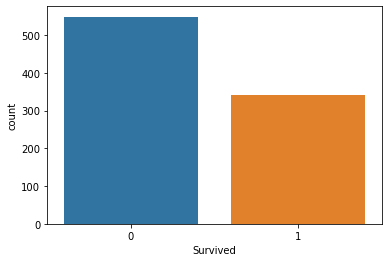

In [300]:
sns.countplot(data=df,x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

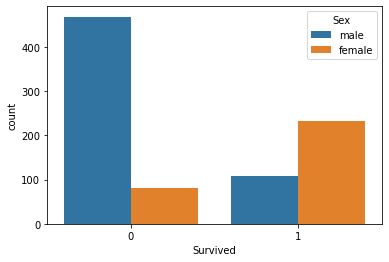

In [303]:
sns.countplot(data=df,x="Survived",hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

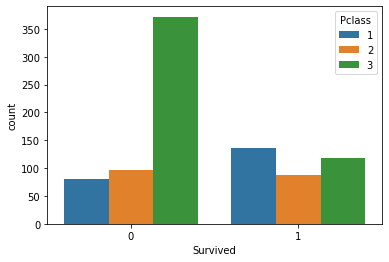

In [304]:
sns.countplot(data=df,x="Survived",hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Density'>

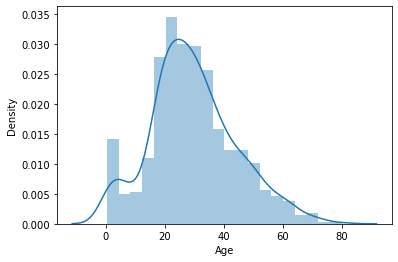

In [306]:
sns.distplot(df["Age"])

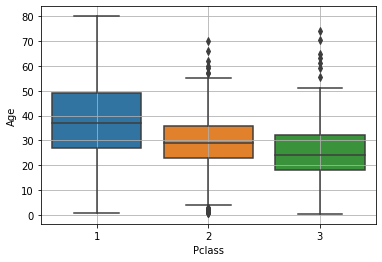

In [308]:
sns.boxplot(data=df,x="Pclass",y="Age")
plt.grid()

In [310]:
def fillage(cols):
    Age =cols[0]
    Pclass =cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [311]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

In [312]:
df.drop("Cabin",axis=1,inplace=True)

In [313]:
df.dropna(inplace=True)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [315]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S


In [316]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [317]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,3.0,1,0,7.2500,S
1,1,1,female,1.0,1,0,71.2833,C
2,1,3,female,3.0,0,0,7.9250,S
3,1,1,female,1.0,1,0,53.1000,S
4,0,3,male,3.0,0,0,8.0500,S


In [318]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [319]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,3.0,1,0,7.2500,S
1,1,female,1.0,1,0,71.2833,C
2,3,female,3.0,0,0,7.9250,S
3,1,female,1.0,1,0,53.1000,S
4,3,male,3.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,2.0,0,0,13.0000,S
887,1,female,1.0,0,0,30.0000,S
888,3,female,3.0,1,2,23.4500,S
889,1,male,1.0,0,0,30.0000,C


In [320]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [321]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])

In [322]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,3.0,1,0,7.2500,2.0
1,1,0.0,1.0,1,0,71.2833,0.0
2,3,0.0,3.0,0,0,7.9250,2.0
3,1,0.0,1.0,1,0,53.1000,2.0
4,3,1.0,3.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,2.0,0,0,13.0000,2.0
887,1,0.0,1.0,0,0,30.0000,2.0
888,3,0.0,3.0,1,2,23.4500,2.0
889,1,1.0,1.0,0,0,30.0000,0.0


In [323]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [324]:
from sklearn.metrics import classification_report
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test =model.score(xtest,ytest)
    print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")
    print(classification_report(ytest,ypred))
    return model

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [326]:
mymodel(LogisticRegression())

Training Accuracy:0.7813504823151125
Testing Accuracy:0.8127340823970037
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       166
           1       0.75      0.76      0.75       101

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



LogisticRegression()

In [327]:
mymodel(SVC())

Training Accuracy:0.6688102893890675
Testing Accuracy:0.6704119850187266
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       166
           1       0.66      0.27      0.38       101

    accuracy                           0.67       267
   macro avg       0.67      0.59      0.58       267
weighted avg       0.67      0.67      0.63       267



SVC()

In [328]:
mymodel(RandomForestClassifier())

Training Accuracy:0.9212218649517685
Testing Accuracy:0.8089887640449438
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       166
           1       0.76      0.73      0.74       101

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



RandomForestClassifier()

In [331]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [332]:
mymodel(LogisticRegression())

Training Accuracy:0.792604501607717
Testing Accuracy:0.797752808988764
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.73       102

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



LogisticRegression()

In [334]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [335]:
mymodel(SVC())

Training Accuracy:0.8135048231511254
Testing Accuracy:0.8202247191011236
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       165
           1       0.84      0.66      0.74       102

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



SVC()

In [336]:
mymodel(RandomForestClassifier())

Training Accuracy:0.932475884244373
Testing Accuracy:0.8127340823970037
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       165
           1       0.78      0.71      0.74       102

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



RandomForestClassifier()

In [337]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [338]:
mymodel(AdaBoostClassifier())

Training Accuracy:0.8118971061093248
Testing Accuracy:0.7902621722846442
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.73      0.73       102

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



AdaBoostClassifier()

In [339]:
mymodel(GradientBoostingClassifier())

Training Accuracy:0.8922829581993569
Testing Accuracy:0.8127340823970037
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.69      0.74       102

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



GradientBoostingClassifier()

In [340]:
!pip install xgboost

In [341]:
from xgboost import XGBClassifier

In [342]:
mymodel(XGBClassifier())

Training Accuracy:0.9292604501607717
Testing Accuracy:0.8127340823970037
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.70      0.74       102

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [348]:
mymodel(XGBClassifier(max_depth=1))

Training Accuracy:0.8183279742765274
Testing Accuracy:0.8164794007490637
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       165
           1       0.80      0.70      0.74       102

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)